In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
import tensorflow as tf
import coremltools as ct

In [19]:
def LoadDataset(dataset_path):
    
    # 載入帶有標籤的 dataset
    df = pd.read_csv(dataset_path)
    df = df.drop(labels="filename", axis=1)
    
    # 取得 features, labels
    labels = df.iloc[:,-1]
    features = df.iloc[:, :-1]
    
    return features, labels

In [20]:
def CNN(X_train):
    
    # 建立神經網絡架構
    model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=(X.shape[1],)),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(4, activation='softmax'),
    ])

    return model

In [21]:
def ValidationPlot(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [22]:
def SamepleTest(model, X, y):
    # 執行預測
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Expected label: {}, Predicted label: {}".format(y, predicted_index))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 40)                0         
                                                                 
 dropout_12 (Dropout)        (None, 40)                0         
                                                                 
 dense_12 (Dense)            (None, 512)               20992     
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

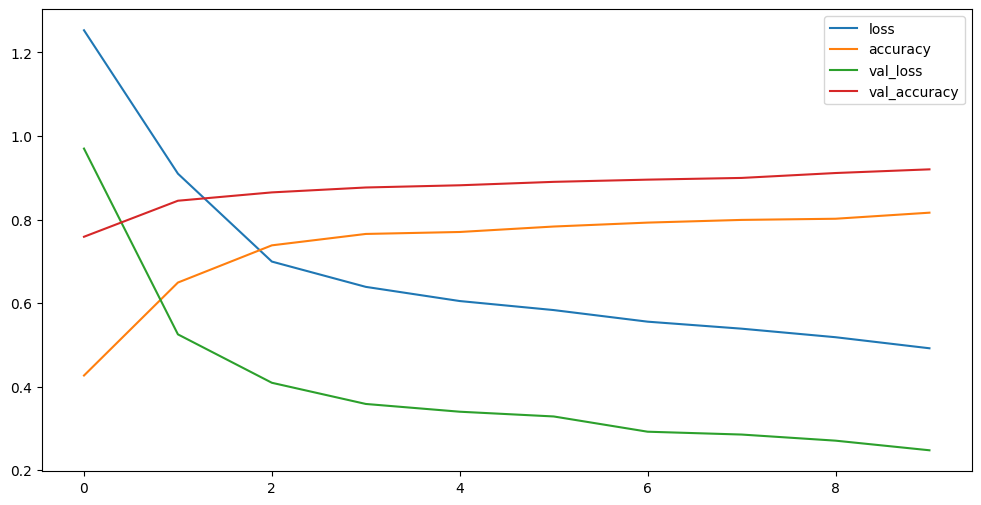

89/89 - 0s - loss: 0.2134 - accuracy: 0.9363 - 70ms/epoch - 784us/step

Test accuracy: 0.936267614364624
12/12 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9363
The test loss is  0.2133515477180481
The best accuracy is:  93.6267614364624
89/89 [==============================] - 0s 592us/step
Expected label: [1 2 3 ... 1 1 3], Predicted label: [1 3 3 ... 1 1 3]


In [23]:
label = 'mood'
# 數據集CSV路徑
dataset_path = f'/Users/phoebe/DJ-Box_model/input/{label}_feature.csv'

# 載入資料集
X, y = LoadDataset(dataset_path)

# 編碼標籤資料
convertor = LabelEncoder()
y = convertor.fit_transform(y)

# 標準化資料集
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X, dtype = float))

# 分成訓練集、測試集、驗證集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# 創建卷積神經網絡
model = CNN(X_train)

optimiser = keras.optimizers.Adam(learning_rate=0.000146)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 訓練模型
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_validation, y_validation), 
                    batch_size=64, 
                    epochs=10)



# 繪製圖形
ValidationPlot(history)

# 在測試集上評估模型
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

test_loss, test_acc = model.evaluate(X_test,y_test,batch_size=256)
print("The test loss is ", test_loss)
print("The best accuracy is: ", test_acc * 100)

# 測試樣本
SamepleTest(model, X_test, y_test)

In [37]:
model.build([1, 40])
model.save(f'/Users/phoebe/DJ-Box_model/keras/{label}_classificasion_model.h5')

/Applications/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# 執行預測
prediction = model.predict(X_test)
print(prediction)

# labels = convertor.inverse_transform([0,1,2,3,4,5,6,7])
labels = convertor.inverse_transform([0,1,2,3])
print(labels)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Expected label: {}, Predicted label: {}".format(y_test, predicted_index))

89/89 [==============================] - 0s 542us/step
[[0.02648045 0.9351975  0.01489895 0.02342323]
 [0.00308601 0.00125673 0.17912647 0.8165308 ]
 [0.05608772 0.02015185 0.03360042 0.89016   ]
 ...
 [0.01839255 0.9704981  0.00599587 0.00511347]
 [0.12138735 0.70046055 0.0736794  0.10447273]
 [0.09382055 0.06934877 0.12722455 0.7096061 ]]
['calm' 'energetic' 'happy' 'sad']
Expected label: [1 2 3 ... 1 1 3], Predicted label: [1 3 3 ... 1 1 3]
